In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import os
import re
import cv2

In [2]:
df = pd.read_csv('tracking.txt', sep = '\t')

In [3]:
X_centers = df[df.id == 0]['xBody'].values
y_centers = df[df.id == 0]['yBody'].values
img_numbers = df[df.id == 0]['imageNumber'].values

In [4]:
data = []
c1 = 0
for dirname, _, filenames in (os.walk('video')):
    for c, filename in enumerate(sorted(filenames, key=lambda x: int(re.sub('\D', '', x)))):
        fr = int(re.findall(r'\d+', filename)[0])
        if (fr in img_numbers):
            img = PIL.Image.open(os.path.join(dirname, filename)).convert('L')
            g = np.asarray(img)
            ind = np.where(img_numbers == fr)[0].item()
            X = int(X_centers[ind])
            Y = int(y_centers[ind])
            im = g[Y-45 : Y+45, X-45: X+45].astype(np.uint8)
            data.append(im)
            
data = np.array(data)

In [5]:

for d, n in zip(data, img_numbers):
    PIL.Image.fromarray(d).save('data2/frame' + str(n) + '.jpg')

In [6]:
#save data composed of 442 images of shape 90,90 into a mp4 file with 20 fps
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20, (90,90), 0)
for i in range(len(data)):
    out.write(data[i])
out.release()





# No background

In [20]:
background = np.array(PIL.Image.open('background.pgm').convert('L'))
a = np.asarray(img)

In [5]:
data = []
c1 = 0
for dirname, _, filenames in (os.walk('video')):
    for c, filename in enumerate(sorted(filenames, key=lambda x: int(re.sub('\D', '', x)))):
        fr = int(re.findall(r'\d+', filename)[0])
        if (fr in img_numbers):
            img = PIL.Image.open(os.path.join(dirname, filename)).convert('L')
            g = np.asarray(img) - background
            ind = np.where(img_numbers == fr)[0].item()
            X = int(X_centers[ind])
            Y = int(y_centers[ind])
            im = g[Y-45 : Y+45, X-45: X+45].astype(np.uint8)
            data.append(im)
            
data = np.array(data)

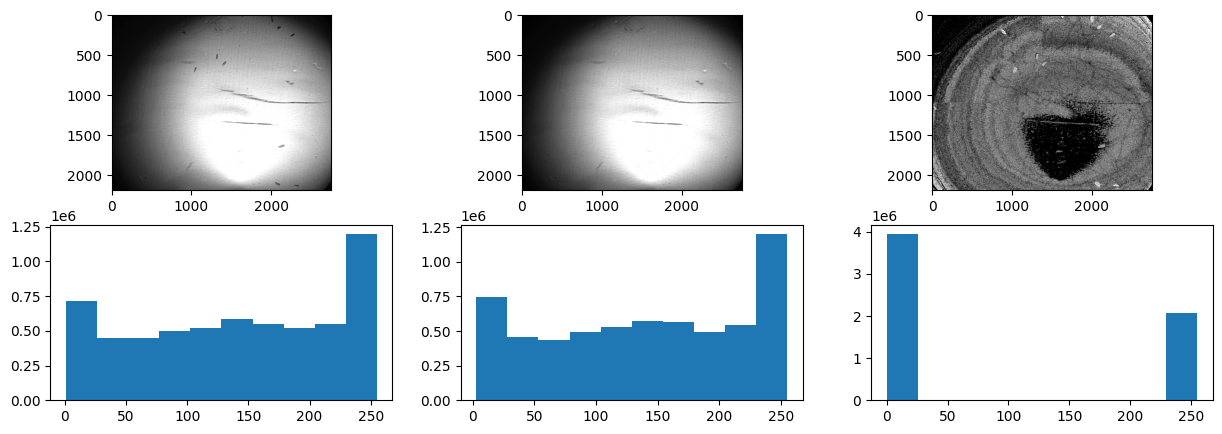

In [56]:
a = np.asarray(img)

d = np.clip(a - background, 0, 255).astype(np.uint8)

#create subplot with 1,3
fig, ax = plt.subplots(2,3, figsize = (15,5))
ax[0,0].imshow(a, cmap = 'gray')
ax[0,1].imshow(background, cmap = 'gray')
ax[0,2].imshow(d, cmap = 'gray')
ax[1,0].hist(a.ravel())
ax[1,1].hist(background.ravel())
ax[1,2].hist(d.ravel())
plt.show()

In [58]:
#create list that varies from 1/20 in 1/20 until 13
np.arange(0, 13, 1/20)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
        2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
        2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
        3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
        3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
        4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,
        4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,
        4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,
        5.4 ,  5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,
        5.85,  5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,
        6.3 ,  6.35,

In [73]:
for d, n in zip(data, img_numbers):
    PIL.Image.fromarray(d).save('nobackground/frame' + str(n) + '.jpg')

In [74]:
#save data composed of 442 images of shape 90,90 into a mp4 file with 20 fps
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_nobackground.mp4', fourcc, 20, (90,90), 0)
for i in range(len(data)):
    out.write(data[i])
out.release()



